# Execution Probability - Part 3 - Sample Mean Comparison 

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar
from pandas.tseries.offsets import CDay
import datetime

class ExampleCalendar(AbstractHolidayCalendar):
    rules =[Holiday('August Bank holiday',month=8,day=30),
            Holiday('August Bank holiday',month=8,day=31),
            Holiday('August Bank holiday',month=9,day=1),
            Holiday('August Bank holiday',month=9,day=4)
           ]

cal = ExampleCalendar()

## Extracting Hourly and Weekly Means

In [46]:
limit_orders = pd.read_csv('Quantities/limit_orders.csv')

# Haftalik ortalama, ticklere gelen limit order quantityleri
limit_buy_orders_mean_weekly = []
limit_sell_orders_mean_weekly = []
# ------------------------+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

weeks_in_months = [
    range(0,7,2),
    range(8,17,2),
    range(18,27,2),
    range(28,37,2),
    range(38,41,2),
    range(42,49,2),
    range(50,59,2),
    range(60,69,2),
    range(70,79,2)
]

days_in_week = [4, 5, 5, 5, 2, 4, 5, 5, 5]
days_in_months = [21, 19]
week_number = 9

for week in weeks_in_months:
    week_lb = []
    week_ls = []
    
    for day in week:
        week_lb.append(list(map(int,limit_orders.as_matrix()[day][1:])))
        week_ls.append(list(map(int,limit_orders.as_matrix()[day+1][1:])))
        
    limit_buy_orders_mean_weekly.append(week_lb)
    limit_sell_orders_mean_weekly.append(week_ls)

In [47]:
# ----------------------------
daily_lb_mean = []  # ----> Gunluk ortalama tick degeri limit buy 
daily_ls_mean = []  # ----> Gunluk ortalama tick degeri limit sell
# ----------------------------

for week in weeks_in_months:   
    for day in week:
        lb_orders = list(map(int,limit_orders.as_matrix()[day][1:]))
        ls_orders = list(map(int,limit_orders.as_matrix()[day+1][1:]))
        
        j = 1
        total = 0
        
        for quant in lb_orders:
            total += (quant * j)
            j += 1
            
        daily_lb_mean.append(total/sum(lb_orders))
        
        j = 1
        total = 0
        
        for quant in ls_orders:
            total += (quant * j)
            j += 1
            
        daily_ls_mean.append(total/sum(ls_orders))

In [49]:
import os
import re

hourly_name = os.listdir('./Quantities/Hourly_Limit')
hourly_name.sort()

i = 0

# Her hafta icin 7 saat araliginda 15 ticke gelen ortalama quantityler
lb_hourly_quantity = []   # -------> Gunluk saatlik ortalamla tick degerleri
ls_hourly_quantity = []   # -------> Gunluk saatlik ortalaml tick degerleri
daily_hourly_means = []
# ------------------------------------------------------------------->

for days in days_in_week:
    
    for j in range(days):
        
        limit_market = pd.read_csv('Quantities/Hourly_Limit/' + hourly_name[i])
        lb_daily = []
        ls_daily = []
    
        for k in range(7):
            mean_week = list(map(int,limit_market.as_matrix()[k][1:]))
            j = 1
            total = 0
    
            for quant in mean_week:
                total += (quant * j)
                j += 1
        
            lb_daily.append(total/sum(mean_week))
            
            mean_week = list(map(int,limit_market.as_matrix()[k+7][1:]))
            j = 1
            total = 0
    
            for quant in mean_week:
                total += (quant * j)
                j += 1
        
            ls_daily.append(total/sum(mean_week)) 

        i += 1
        
        lb_hourly_quantity.append(lb_daily)
        ls_hourly_quantity.append(ls_daily)

In [51]:
limit_buy_hourly_quantity_weekly = []
limit_sell_hourly_quantity_weekly = []
lb_hourly_week_means = [] # -------> Haftalik saatlik ortalamlar
ls_hourly_week_means = [] # -------> Haftalik saatlik ortalamlar

i = 0

for days in days_in_week:
    
    week_mb = []
    week_ms = []
    lb_hourly_week = [[] for y in range(7)]
    ls_hourly_week = [[] for y in range(7)]
    
    for j in range(days):
        
        limit_market = pd.read_csv('Quantities/Hourly_Limit/' + hourly_name[i])
        
        for k in range(7):
            lb_hourly_week[k].append(np.array(list(map(int,limit_market.as_matrix()[k][1:]))))
            ls_hourly_week[k].append(np.array(list(map(int,limit_market.as_matrix()[k+7][1:]))))
            

        i += 1
    
    week_quant_lb = []
    week_quant_ls = []
    
    for z in range(7):
        week_quant_lb.append(list(map(int, np.mean(lb_hourly_week[z], axis = 0))))
        week_quant_ls.append(list(map(int, np.mean(ls_hourly_week[z], axis = 0))))
        
    limit_buy_hourly_quantity_weekly.append(week_quant_lb)
    limit_sell_hourly_quantity_weekly.append(week_quant_ls)
    
for i in range(9):
    temp = []
    temp2 = []
    for j in range(7):
        mean_week = limit_buy_hourly_quantity_weekly[i][j]
        z = 1

        total = 0

        for quant in mean_week:
            total += (quant * z)
            z += 1

        temp.append(total/sum(mean_week))
        
        mean_week = limit_sell_hourly_quantity_weekly[i][j]
        z = 1

        total = 0

        for quant in mean_week:
            total += (quant * z)
            z += 1

        temp2.append(total/sum(mean_week))
        
    lb_hourly_week_means.append(temp)
    ls_hourly_week_means.append(temp2)

In [54]:
# ----------------------------
weekly_mean_lb = []   # Haftalik ortlama tick degeri lb
# ----------------------------

for i in range(9):
    mean_week = list(map(int,np.mean(np.array(limit_buy_orders_mean_weekly[i]), axis = 0)))
    j = 1
    
    total = 0
    
    for quant in mean_week:
        total += (quant * j)
        j += 1
        
    weekly_mean_lb.append(total/sum(mean_week))

In [55]:
# ----------------------------
weekly_mean_ls = [] # Haftalik ortalama tick degeri ls
# ----------------------------

for i in range(9):
    mean_week = list(map(int,np.mean(np.array(limit_sell_orders_mean_weekly[i]), axis = 0)))
    j = 1
    
    total = 0
    
    for quant in mean_week:
        total += (quant * j)
        j += 1
        
    weekly_mean_ls.append(total/sum(mean_week))

In [56]:
# 00 - 01 : M1 LB, LS
# 10 - 11 : M2 LB, LS

month = [
         limit_buy_orders_mean_weekly,
         limit_sell_orders_mean_weekly
        ]

# ----------------------------
limit_buy_mean_monthly = [] # Aylik ortalama tick deger lb
limit_sell_mean_monthly = []
# ----------------------------

for k in range(2):
    
    total = np.zeros(15)
    
    for i in range(5):
        total += np.mean(np.array(month[k][i]), axis = 0)
        
    mean_val = 0
    j = 1
    
    for quant in list(map(int, total)):
        mean_val += (quant * j)
        j += 1
    
    if k == 0:
        limit_buy_mean_monthly.append(mean_val/sum(list(map(int, total))))
    else:
        limit_sell_mean_monthly.append(mean_val/sum(list(map(int, total))))

    total = np.zeros(15)

    for i in range(5,9):
        total += np.mean(np.array(month[k][i]), axis = 0)

        mean_val = 0
        j = 1
      
        for quant in list(map(int, total)):
            mean_val += (quant * j)
            j += 1
            
    if k == 0:
        limit_buy_mean_monthly.append(mean_val/sum(list(map(int, total))))
    else:
        limit_sell_mean_monthly.append(mean_val/sum(list(map(int, total))))

In [57]:
i = 0

for days in days_in_week:

    week_mb = []
    week_ms = []
    lb_hourly_week = [[] for y in range(7)]
    ls_hourly_week = [[] for y in range(7)]
    
    for j in range(days):
        
        limit_market = pd.read_csv('Quantities/Hourly_Limit/' + hourly_name[i])
        
        for k in range(7):
            lb_hourly_week[k].append(list(map(int,limit_market.as_matrix()[k][1:])))
            ls_hourly_week[k].append(list(map(int,limit_market.as_matrix()[k+7][1:])))   

        i += 1
    
    week_quant_lb = []
    week_quant_ls = []
    
    for z in range(7):
        week_quant_lb.append(lb_hourly_week[z])
        week_quant_ls.append(ls_hourly_week[z])
    
    limit_buy_hourly_quantity_weekly.append(week_quant_lb)
    limit_sell_hourly_quantity_weekly.append(week_quant_ls)

# Daily Mean Level Value for Limit Orders

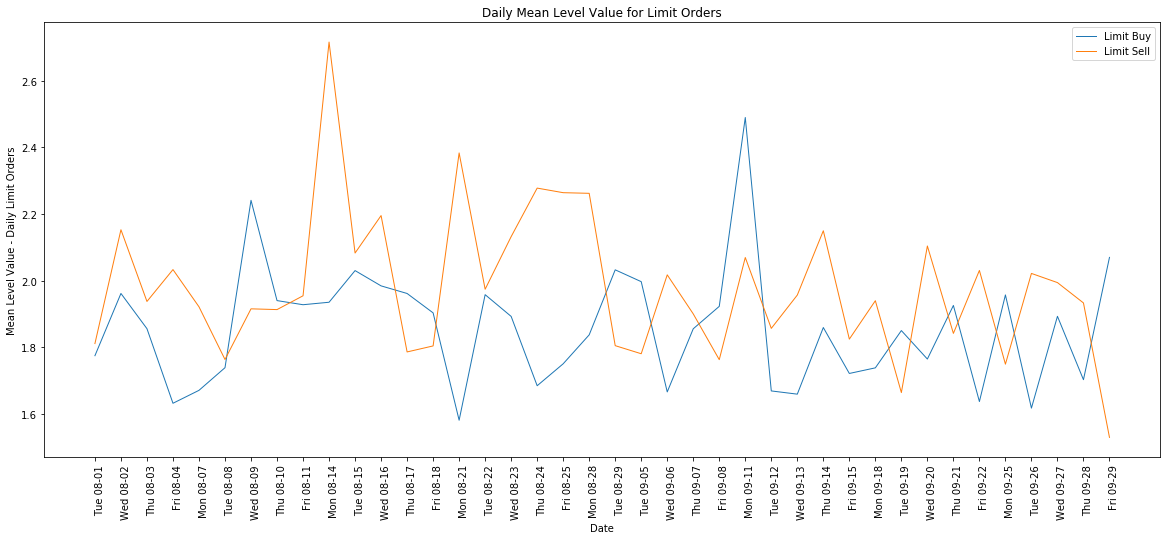

In [72]:
rng = pd.date_range('2017-08-01','2017-09-29',freq=CDay(calendar=cal))
rng=rng[rng.dayofweek<5] #exclude weekends

plt.figure(figsize=(20, 8))

plt.plot(pd.date_range('2017-08-01','2017-09-9'), daily_lb_mean, linewidth=1, label='Limit Buy')
plt.plot(pd.date_range('2017-08-01','2017-09-9'), daily_ls_mean, linewidth=1, label='Limit Sell')

plt.xticks(pd.date_range('2017-08-01','2017-09-9').astype(int), 
           rng.strftime("%a %m-%d"), 
           rotation=90, 
           ha="left")

plt.title('Daily Mean Level Value for Limit Orders')
plt.xlabel("Date")
plt.ylabel("Mean Level Value - Daily Limit Orders")
plt.legend()

# Hourly Mean Level Value for Limit Orders

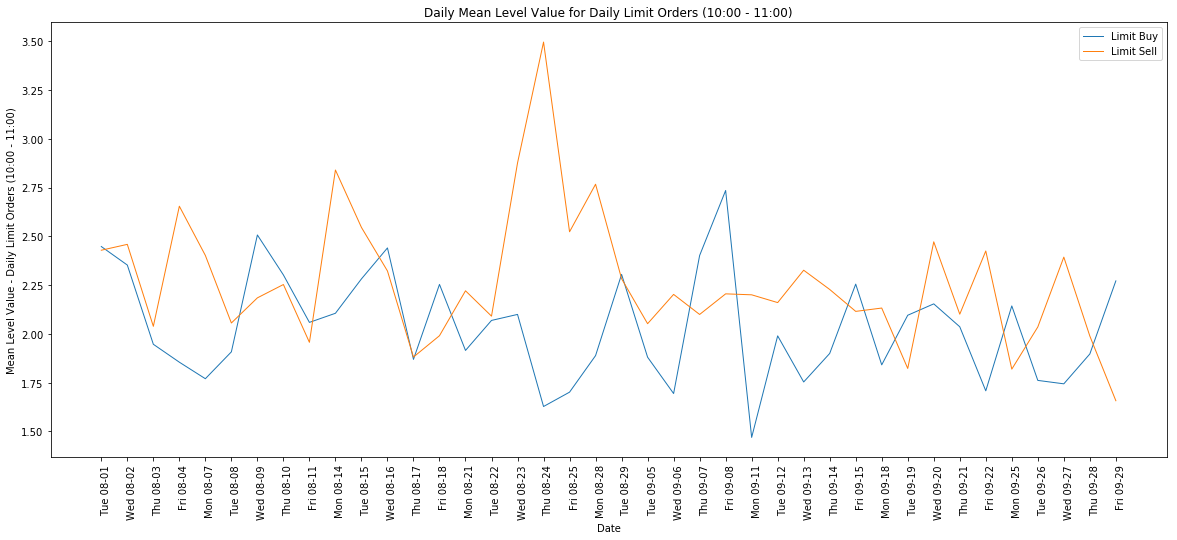

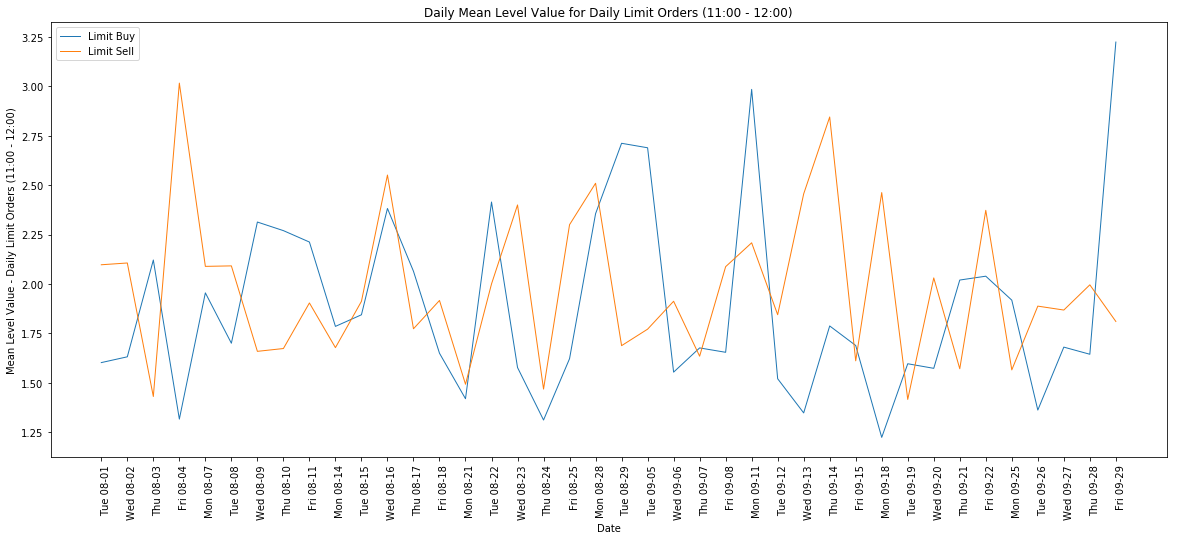

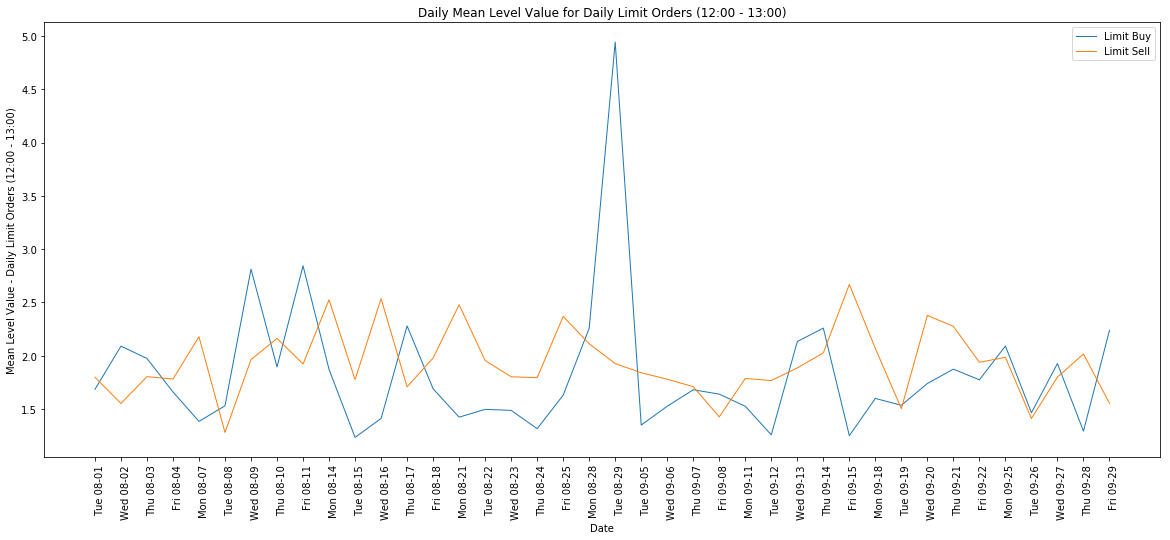

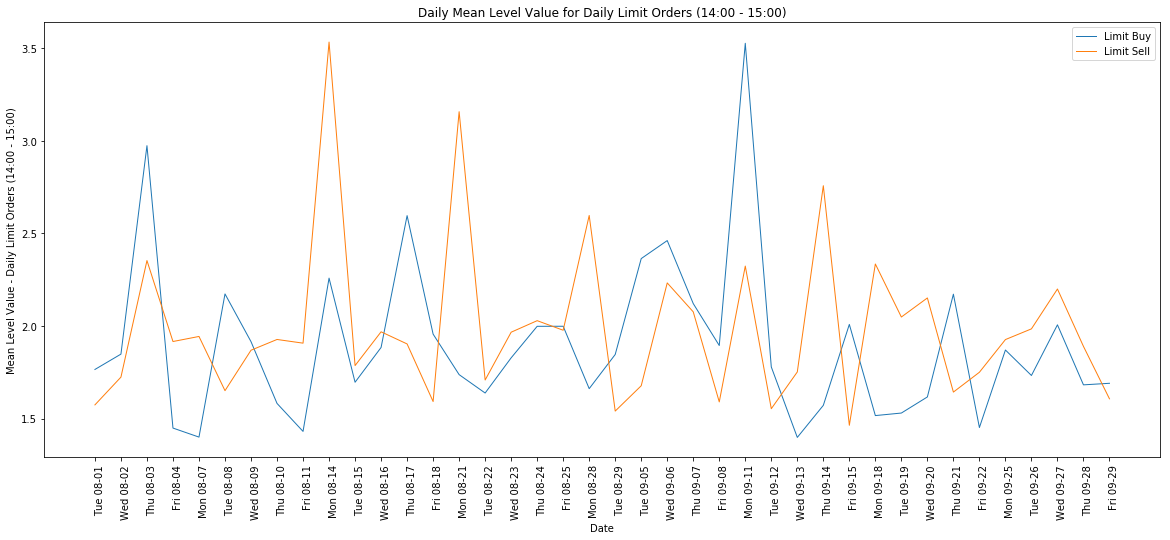

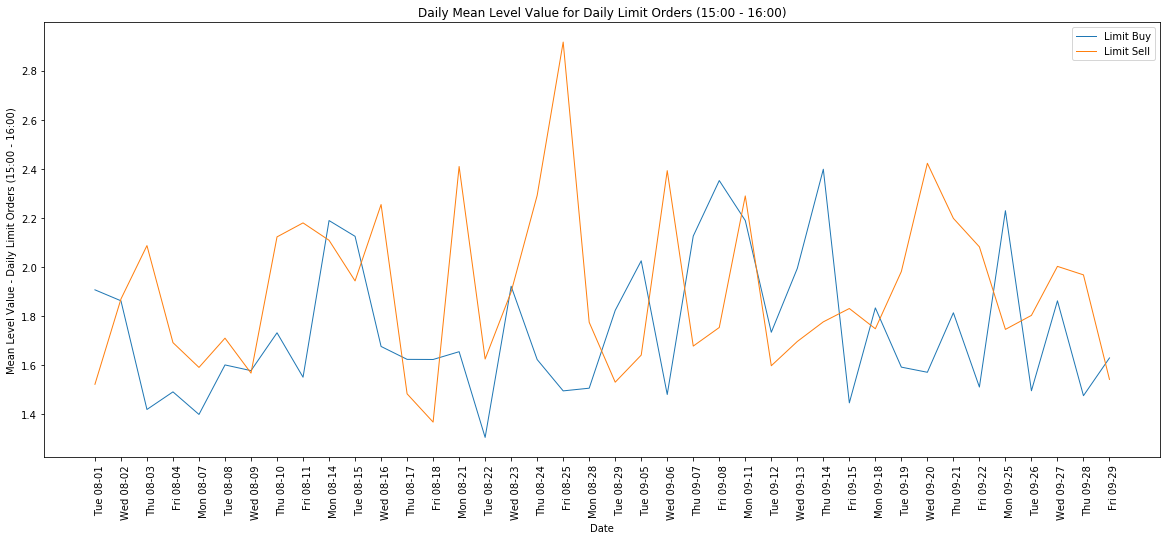

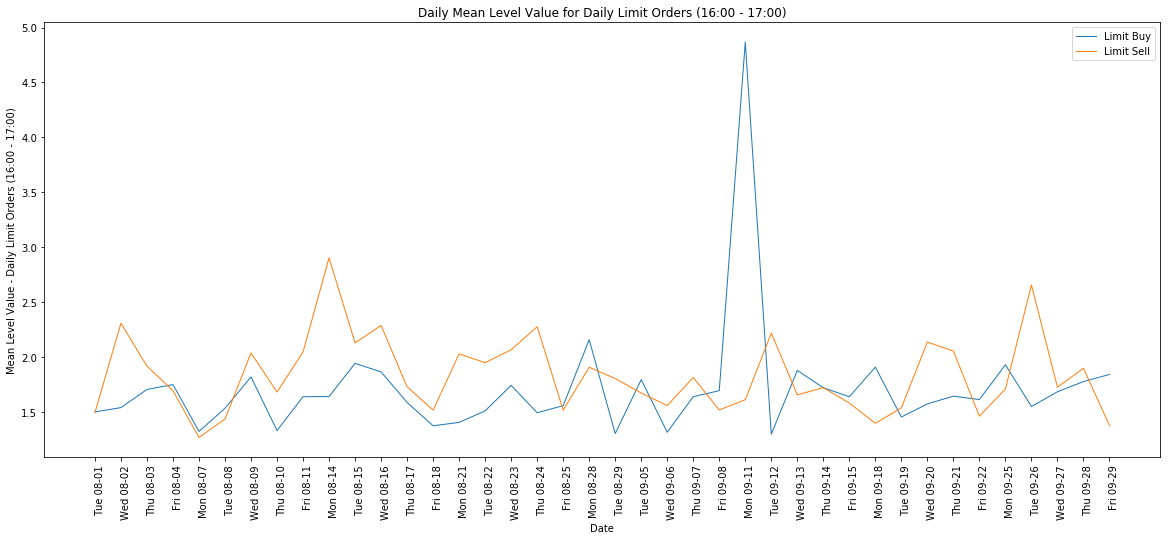

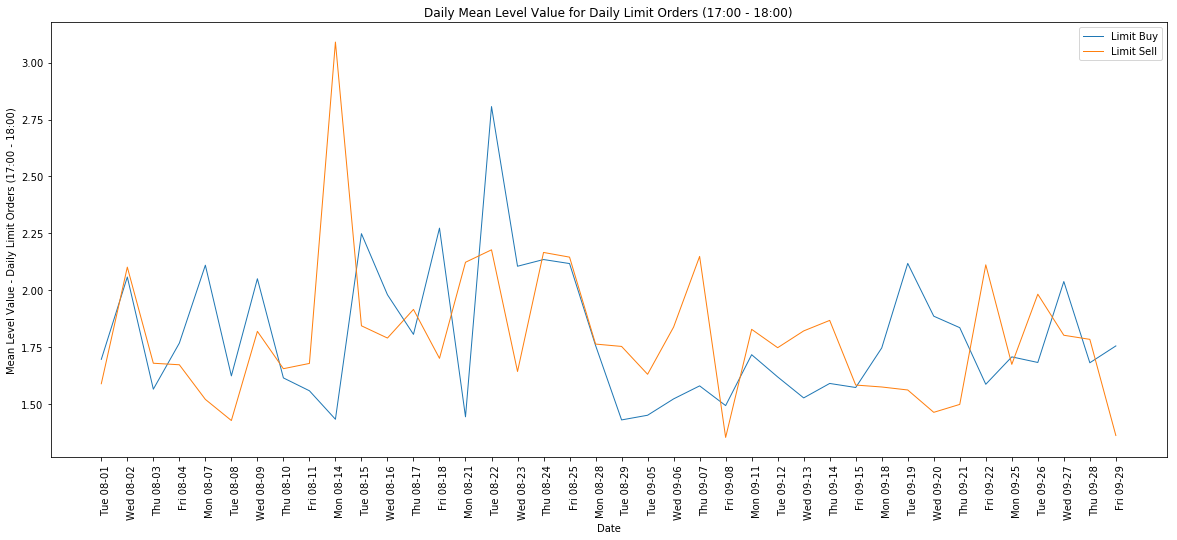

In [104]:
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', 
         '16:00 - 17:00', '17:00 - 18:00']


for i in range(7):

    plt.figure(figsize=(20, 8))

    plt.plot(pd.date_range('2017-08-01','2017-09-9'), 
                 [item[i] for item in lb_hourly_quantity], 
                 linewidth=1, label='Limit Buy')
    
    plt.plot(pd.date_range('2017-08-01','2017-09-9'), 
                 [item[i] for item in ls_hourly_quantity], 
                 linewidth=1, label='Limit Sell')

    plt.xticks(pd.date_range('2017-08-01','2017-09-9').astype(int), 
               rng.strftime("%a %m-%d"), 
               rotation=90, 
               ha="left")

    plt.title('Daily Mean Level Value for Daily Limit Orders (' + str(hours[i]) + ')')
    plt.xlabel("Date")
    plt.ylabel("Mean Level Value - Daily Limit Orders (" + str(hours[i]) + ")")
    plt.legend()

# Weekly Mean Level Value for Limit Orders

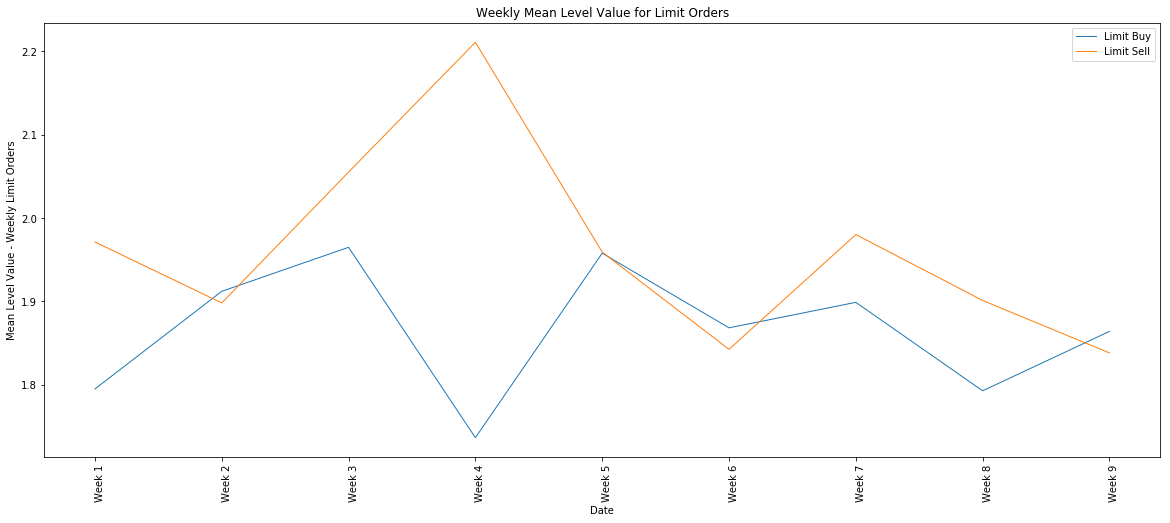

In [119]:
plt.figure(figsize=(20, 8))


X = np.arange(1,10)

plt.plot(X, weekly_mean_lb, linewidth=1, label='Limit Buy')
plt.plot(X, weekly_mean_ls, linewidth=1, label='Limit Sell')

plt.xticks(X.astype(int), 
           [('Week ' + str(i)) for i in range(1,10)], 
           rotation=90, 
           ha="left")

plt.title('Weekly Mean Level Value for Limit Orders')
plt.xlabel("Date")
plt.ylabel("Mean Level Value - Weekly Limit Orders")
plt.legend()

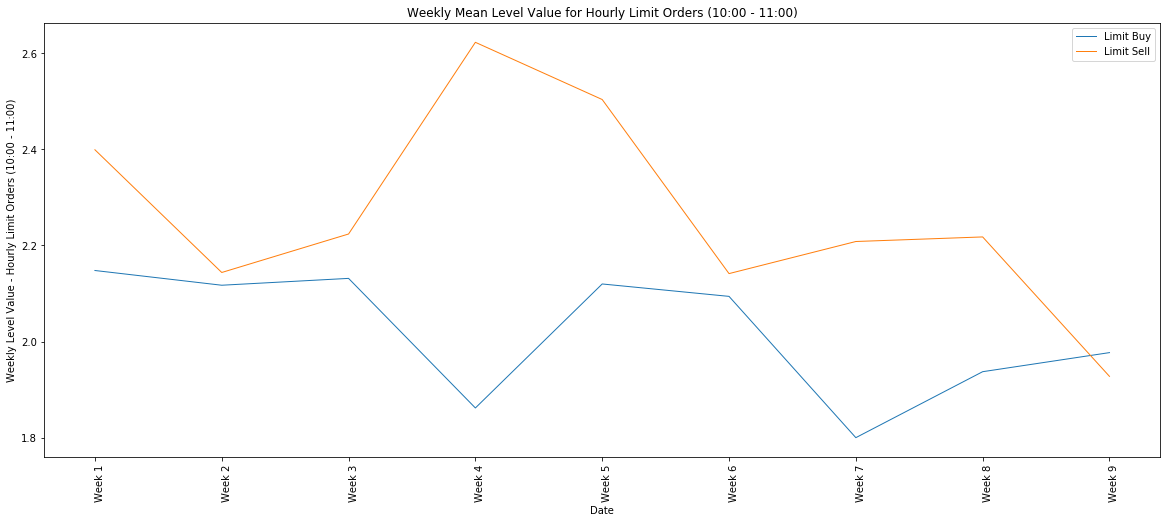

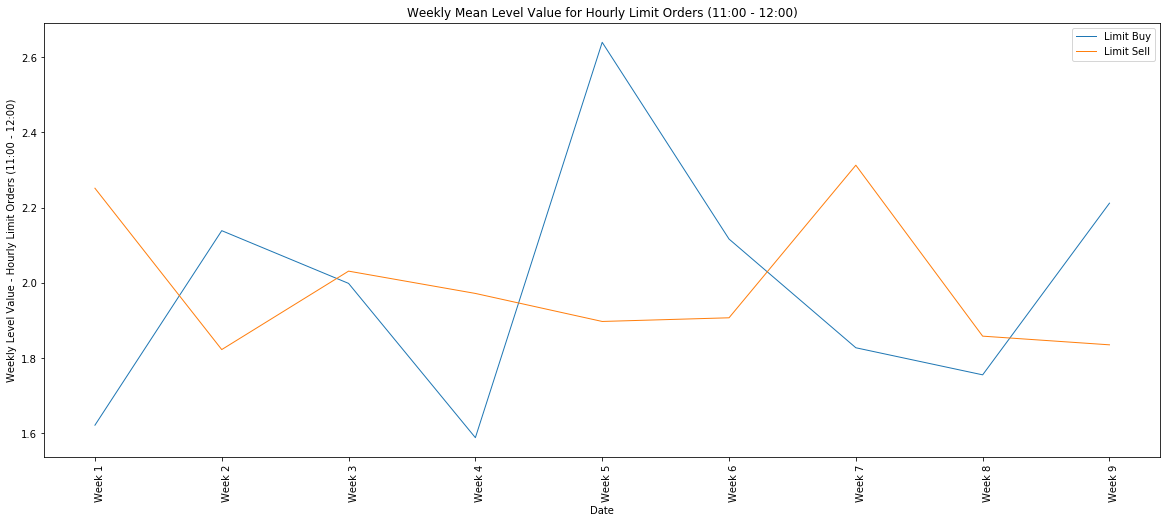

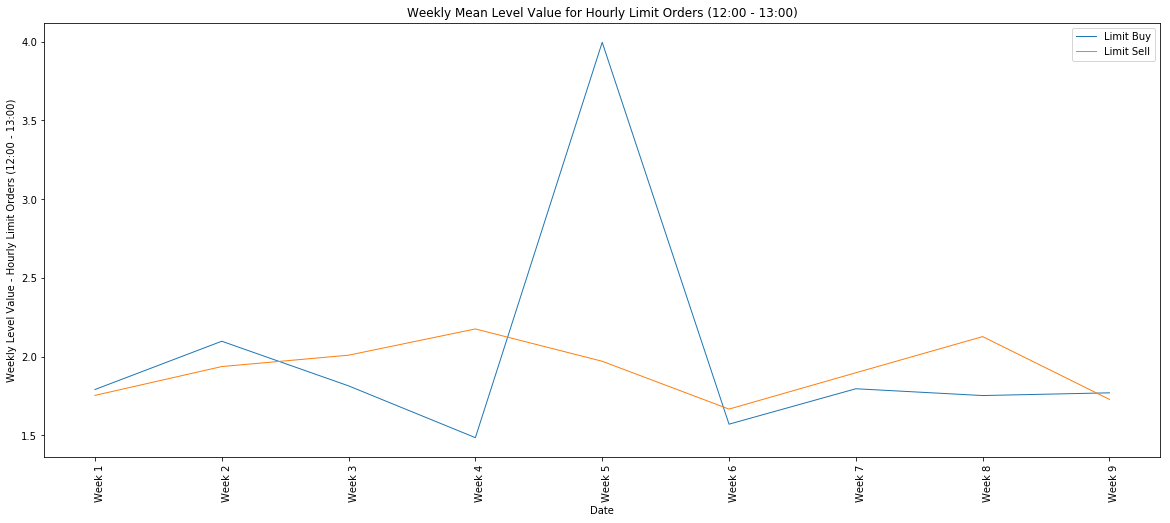

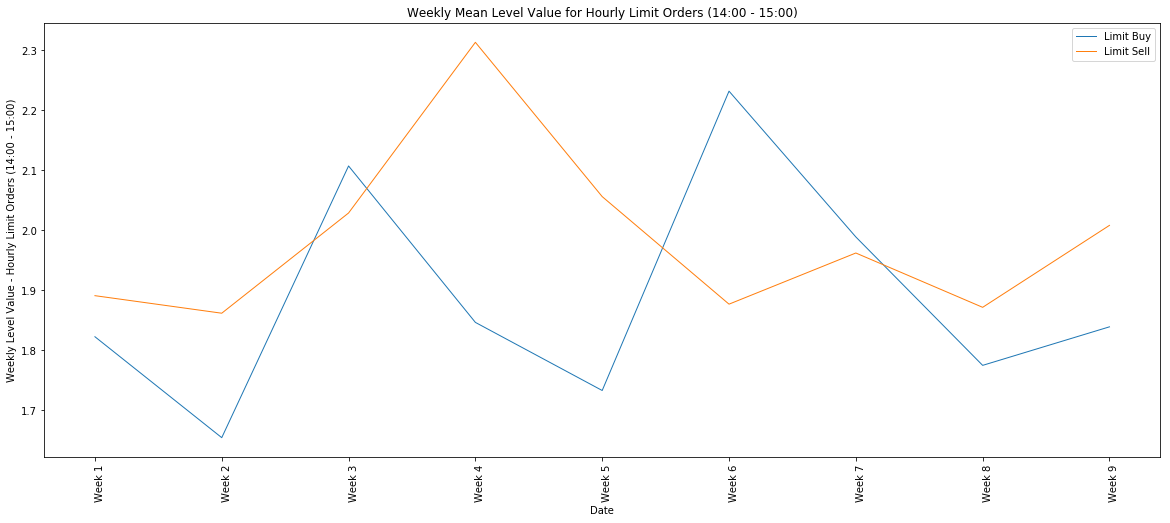

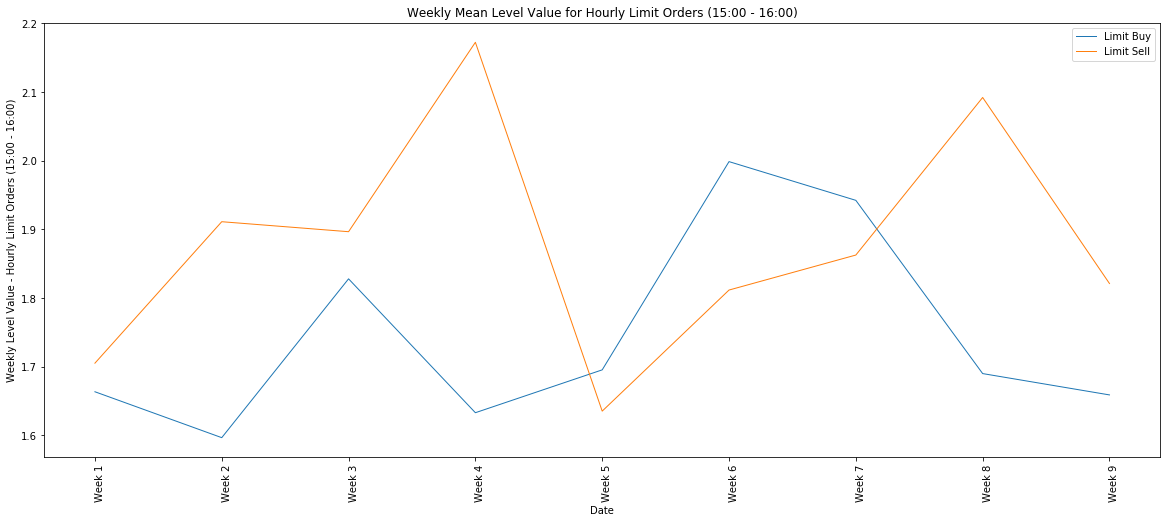

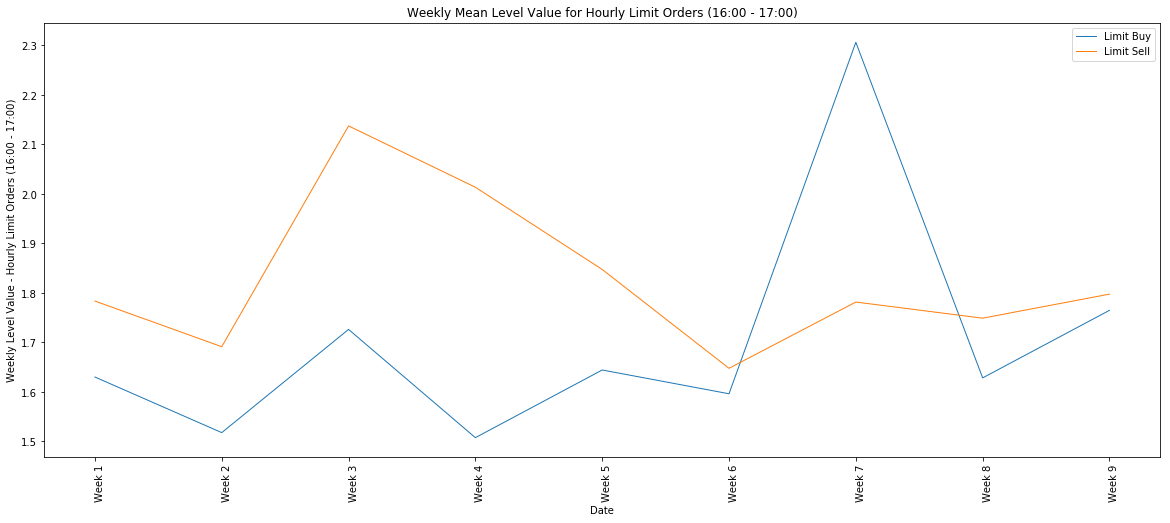

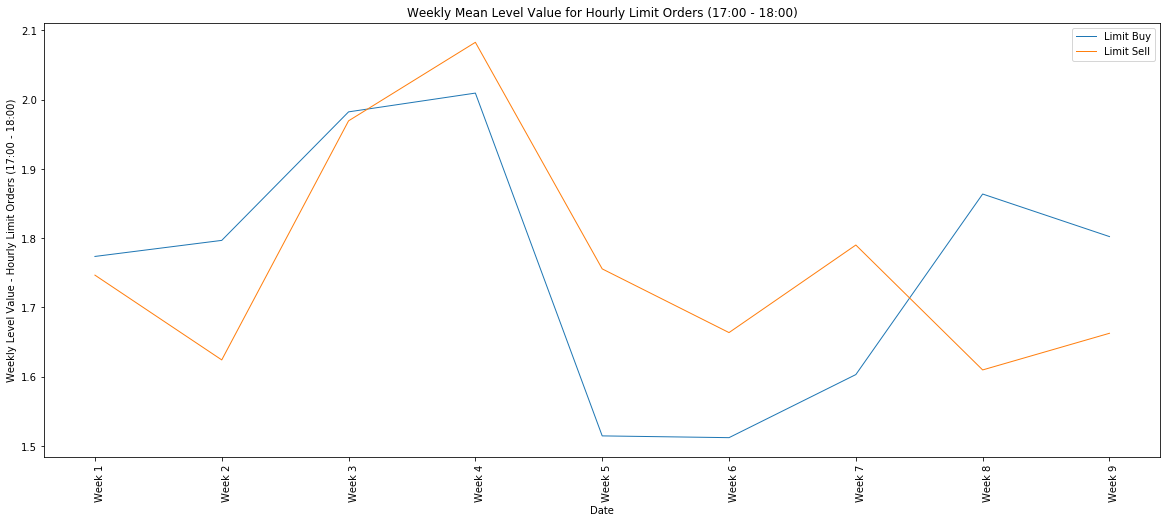

In [121]:
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', 
         '16:00 - 17:00', '17:00 - 18:00']


for i in range(7):

    plt.figure(figsize=(20, 8))

    plt.plot(X,
             [item[i] for item in lb_hourly_week_means],
             linewidth=1, label='Limit Buy')
    
    plt.plot(X,
             [item[i] for item in ls_hourly_week_means],
             linewidth=1, label='Limit Sell')

    plt.xticks(X.astype(int), 
               [('Week ' + str(i)) for i in range(1,10)], 
               rotation=90, 
               ha="left")

    plt.title('Weekly Mean Level Value for Hourly Limit Orders (' + str(hours[i]) + ')')
    plt.xlabel("Date")
    plt.ylabel("Weekly Level Value - Hourly Limit Orders (" + str(hours[i]) + ")")
    plt.legend()